In [1]:
%matplotlib inline
import pandas as pd
from gene_matching import *

In [2]:
import seaborn as sns
import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (16, 10)

In [3]:
gene='tcaggcacctaatgccatcgctaattaccacaaatatttccgaggacacgcttccaacgctatctaaaagccgacctgggggcaggcaatagtcagtcacgattagcggccgaggcctatttactgggaggcacagtcgatgcagtgttcttatacaaactctggcctgtgagcggttagggtaggagcgtatacggtagcagaatggttacccgctgtcgtagttgcgggtgggaggccacactgagagatcggtttgctcgagtctgtacaaaaatcacgcagtcaacgtctttcgttccctgcccctggagttcttcctgttttctagacggtagacttctctagtaaacaacggacgctcacataccggtccgccgccatgtagtcacgaacacgtaacgatcaggcccctctcatggaggccggcgatgaacagaacacatacgaaatacctgagccgtaaagtaatctacgccattgctgaccgccccggaatcacggtcggttctaggggattacgtcgttttgttatcttctcacgcacggaagccatgtacctgttgttgaagtatgtagtcgttgtatcccacagagactggatctccatctcgcgcatcctaaccccggtacttagctcattacgcttcgtataatgaccggacgagagctcgtcttatcacctcaatgagagacccactcagttgaccagaacccgagtaaattcagaccctatggcaaggtacacgtggccgctttattggccgcgcttttagagatacgccaagggactgatgggagttggtttgataacgttagttcatgttaaatttaggttctaacatctcattgttgagatgaggcacaggaaggtggagcacatcagtttgttactgtgatctgtagtaccaggatgtacccgtatggggcacattccgaatacctcgccatgttgtgtacgtttggtccggtcattgctccaaccctgcattaaataagtgcagacgtagctcgttcttcggtctagcaatcgtctctgtaatatctctgtggataacgtgttgtgtagtgcgattatcgatggcgcggggtccgtgggcaaaatcgcggtatactgaacgccgtctgtttagttctgtctacttgatgttcaagatccggctcatcggagcccaagtacaagaaggggtaaccatcgctttgtcatagcacaactctggtacaaccacgcggctaactctcctaggggctaggcaaacgatgtcgcattcacgcatggtatctcccggcaggaaatctaatcaacgtccctagcccagctctgcacaaagacccccgtacaactgacgaggcgcagcgcccaccactgcaccgactgaccgcaaggactccccagctacaagtgacgccatcctggattgtccgtccgaacgcgccctggccagtaccgtgattttgggaccggttatctcttttcggcaggagatgtatcccctggcggggccggagtttgctttgcgacgtttaccacgcatactcagggcgctaatcacatgtacgctgcttaccttcccggccagcgacttcacattttggccaccttatctttcggcgagaggccatctcagatatctctttcctgacataagcactaattatcacagggtcctaaaagtgaactccgtcgatgctcgggcgtctgaaaagcgttcgattaccggcgtagtgagaaccctcggtcgccgagtgtaacgtatagtctagaacccgagcaagtatgatcgtccaagagtatacccagaatactcgcaattaaacccctgaccatgtgatatcatactgaacagccttggtcgttaaggacaaggcgcctcgttatcgatttacttccatgatcgtccccacatgtccagctcgagcttttccgtgaagtggcgtcgccggcagagctgccatcagggggcgtgtacgtgaaataccagcccaacagcgcattaaggatcgatcttgagggatggatgttgcttcctacatgatcttcgaaccaatatccaggacccagggtcctagtttgtggtgcttatggatcacgggtgacaaacccgcgacttagtgcttaaacaaacaaacggaaagtatcgttcatgggcggcgcaagggaaactctgtccaatatctggtccgtaggtcggccgaggcaatgggcccgaggagggaagtatattaggccgtgtccttgcaagcgcggccttgggctatagccttgtgcaaagtcagtcttgtccgggtctccccacagtaatcgttctgtagatggggtacgtccttttacagggaaacctggaccgcgcgttcgctggaccgagaggtctaaggagagcaatgattgttacagcctgccctctcaaggatatattgtcggtcgtcctgtaagccattcagttccgtctacaattcactgttaagtgatcagcctcgtaaatcgactctgtctttctgaattatgtcggtggtactaggggagtcggctgtaccgtcagctatgactcggatgttctgtgagtgcccttttagactcctaaagcctaatcagcacggtggacgtaacagtgcgactacaaagatatgctaaggtagcttggaatcctgatgggtggccacggacgacgaactgcgacggcctcgtttcattatgtatccggctatgggacggataagatgtactaacagtcgccggctcaagcagctaaccgattgtgttgtaagtgtgccaacataaactcagggcgatgaattcactgatacgaccttgcatcgaaggtttcctttaatgtggcgagaggccggcgccctgtactagtaccaggggaggagaatgaaaacgtcggcaccaggaacggacgtatagggagtttcatgttcctttgatgatcttcgtcagtaccatcgagacggttggtcctgagcaccgacgtccatgttcgacaatgctgctatcataattcgtctagactgcgacacgccaccgatttgaaaaaactatgcagacttagggcggcgccaccctgtagtgtcggtgaagcatgcagtcacaggcaaggttgaggtagcgtcttcgacagaatttcggcgctctttaacgtcggtcttggccacggtatgaatttggcacccacaaacggatagtgataacattatgttttcagtaagtgagcgctcttacctcgcaggtgacgcaacagctaagagttttttctgcttactagctgcaaatcatttggttcgcaccgtctgacttccattcacacagcctcaaggtgggggaacttcgtgtaaaaagtatggaatacagtggtcgaggccgcagagttaagactagtcttacgttacgacgacgggggaataaggcaaccgctaccatacgtacgccaacgcacattcagtactatgtatgcacccaccgaaagggttatactcgatccgcaaggtggttacacgtgattcaacggccggaattttaatcgaacttattttaatccactaggtaggatggatcgctggactcgaatagacttgtgtgacaatagacgcgcacgagacgtgacggtcccctagaagtatttgagttcagtgtagagaacgcatagcatgccgcctcccagactctcagacccgcgaccggagataaattctttgagtgcatggcccaggtagcgacttatacgacttttacccacgtgatcgcaccatccgtgtggcctcaggagatcacatggatccgggagaaaagattgattgaattcgaaatgctaaaaacctcttccgtcagggacttcccgacaacaagggcgctcggacaccaaagccgaacgcaagtccttgcgtactctaatccgccacactgaatggagcggcggtaaataaaatttgatcgtaggaggcgtgtaataaggctgtgcttagacttgcagagatcacaccaagtcgcgcaattcccttatccacgtgggtgcgtacctcggaggatctgatactagttgcctcagtgagacgcagatagcgacgaacactgaagcggaatattacagcaggactagggacgctatatcgggttaccttatgccccctgaaccaagctaactatggatcggctcaggcttggattgcttgtcagcagtgcagtgggatttgagctatgatccgtacggacacaatttgagacttatcaatcgaatcctatacaaacgtcggtatccgcttagcgcgtagggtgaactcaatcgtgggatttcctgcaaaaggggcggcgttgctaactcgccgacattccccgggtattaggactatgaagaacagcgtaatcactgcactgttcggacaattaaccaaagcgtattactcggtcatctagtaccttttataacccggttgcgcccaagttcattagccgaccggaggtttctgctacattcgttgtagcatcgtactccgctagagcacagcaagccctcacccgtagtgaactggctgctcggaatcaaagaatgtgtcccgtgcttttactcctgctccacagtattagaatctaaggtccgaacttaatctagtaaccatccgtgaaatggggtatattccaaacatggttaatacgcaggggcaggaagcgcttgcgatgattctcccaggcgcctcggcgcgttcgcaggaacctaactcggaccccgtccggactgacagcaccgcccaaatatagtgtccgtgcctcatccacagccgccccacggaatttagctcaataatatttatgcttggcctcaggtctaattggtatcatgcggggctcggtattcgggagatgacggtgcatgctggtacttctggacataactttgttgacggtttttgctgctattgcaggcctacccttagtcaacgagggcgcgtatctcgtcgtaccatgtggtaactgatacgcacaattagtggacctatgataacaacccccttccttcaatggagggaatttcgttctacaataatctgccataggtacgctactgggagcttgtcaggcttgaggccccagtttaggtctaagtttcagcagtcctcgaccgtagggatctttctgaggcgttaccccataactcggcagactgcccattccgattaaaacgcagaagcccgcgcgctcctcactttgcggtggcaaggcagcgggaacgacaccccctacatgctagatggctgccaggccctagatcccaatattgttgctcatcacggcacctgaaatacctgaaaataccatatttagttaagtcggattgtatttctactgcattcaggaggtggccgaagaaatgggttatatcatatgaatgtttattaagggttgcgcatttgatccacctctagggcggtggctaaattgaggcccagcatggattacagtgcggagtcgagtgtgtcgcaaaaattggtcttgtacttgagaagactcaagcataaaggattcgggaaagtggtttgccggtaagaccctttgcgacgattgttatcacagtcacagagtagtatccaattcgcggcagctcttcgtaaatgtggtggacttgtgttcacagaatagaagtgtattgagcaaataacgggcagatcgggacgctatagaatattttgcattgggctaggcaatgcttcggggcaagccgttcgtccgctggcatctaactagagcgcagtcgaaacgggagagcatcctgactccgtcgtttttgttattacactccacgtgcctacacttatcgcacaacaagcagattcgatgcaggatcttcttatacgggcagcattcgcgtacagtcagaaagcaggccccaagcgttacaaacgtgggttcgacattgttgcggtattgcgcaaaggattgatagtgaccggggtcaacgtccatttggtaaagcagatgtttagcgtatatccacccagtaatcgcgaactttttttatgcacgtcggctgtattatgcacggaacgatcggacgagccccttgccccagaatgtcagctgttatccaccttagggagtctaacggggcatcgttggggtaacgctcagacgctgcggttcgatatggctcactagtggtcagcgagcgcgaaaggttcttgccttaaaagtgcttttgtgccttctcctgccaggaaggacctcagcttagaatctggtacgaaaaccctagctccatagggacctgaagacgtcaattacgttggtccctcgctcaaaactagtatactaacggcaagagtgtcggggacgatcttagtggagaaccgttggagggcttcagggaagtagaatgaaggttacttaagatctgtattggcgaacatcgttgtgcccttcagcaaaggtagatttcctaaaaagagtgtagcgttaccgaggcgtctgctcgttgaagcttacagtcctacaatagacagaatatgccgaggagcacgcgcattaacgacacccgaatatcaattccccctcagaccgtgacgcggctctcttcccgttcagtcacgtgtgcttgaaacgcatctgcaaattcgggtcgcatacttcatcacatacttttaatccaacctaccgatagactctttgagtgttatatgtagttaccatctaatgtactaggtatatacccaccgattgcctgtcggtaggtcaatggatctgttggtcctcagtaggatttctaagtttgggctgctcctctttctataatgagaagccgtattttctaatggagagaattcgcgggttagctcccgagacaacggtacatttatttcgaacgacggggttctgatcatcaatcgatcacgctatacgtcggcagagacacggccggtatatctgctcttaatcttaatggtccaaagctgcgtgtcttgcagtgtctttattcgtcatcatgtctactcaaagccctgggtttctctcaacgaccacaaaagtgacggctctgcagagtatttacgtacgacgctagctgcatccattttttgtaggacccggcgctgcgaagacggtgtcgccggttcgtcacttagccttaccatgagtagagctgagacggcttccgatagactaagcaaagctgcgtaaccacacggcggcggctccgttccccggccatgccacagtttatagctgaagctacacgtgcaacctcacttaaacgccagccgcacaagctctgaaatgctaggtatacagggaactagtgactgtatcacgtttagaatcccaatagaggactcggaagaagataagtatcggtttcgaatgaccctaggacgacttctttcaattattttgattaccttcagtcgacgatcccatttgcatgccgcttgatttcgcccaatcggtagtttacaccttacggaatttcatgacctggtacatagttccttgcgaaccaaatttttttgatcgaatgtaagcggttcattctgtggttgtgagataaatgtaaccatgacgtccctaagaaatggagacataagggtctcccttctcgcatttcactctcctggtcatgttaacgcgcggcgggatgtactgctgtcttgctaggctcttccaatcgaaagccatttgcataattcttggatttgactacgtttgatgcagtccctcccacttcaccaataccctgttacccttactctcccacctatagtaaaaggtagaaataagcatggcgctatttaagtgtgacacctgtgcatgcgtgaatggactcgtacaggacaggggcgctagagaggactggggctacttgtaggcgacggcttcccgcgctatctgatcaagggatcaggaacaactgcctgtacttttttgggatatcgtcaacgcagttactatcatccaagctagactaacttcggatacggacagttcttcccgtctgacttgtgagttacggggggatgcgtctccgctcacttacggttactcggttgactctacaagaagcgacgataggactgcgccttttctcctggggactaggcaggttttgcttgccaatcccatattgtgtgaagtggtagaccagagtgcaatacaccggccctgactcagagtcagattcatgctcgccggcgcatatgtcatctcccctgccccctgttggagaccgggaatcggtaaaaaggttgttgccatggttgggtcgcccttccattaccacgagtaagtttcaccctgtcagaccgaacaataactcgactgagaggcatcggtatcatggtccggctgagaggcgtgcaaacactaagacgctcgttgtcggacggatgccctatagtattaccagtctattgccgggcaagctgttgagtcatgtctagccaccttcctaataaccgaggacagcgctagagataaccacgctgcgcagtttgcgcagtcctgcctggaggaccttcaaatatagtttcgcctacgaatagcaccgagacggagctacgtgagtcctggagtcgatcagagattatttcggcgtgcccccccccgggaacggcgctgcgacggaatcaaacgagtccaaaatagttgttgtaaccatgctgctttctcagaatttgccctcattcgcgctacttagcataccatgtcaaaagcggtaaggccgttttgggtgtgcacataaatctacgtcaatcgtaaacctgattgcggggaacacggtcagttacaacacgagtcttctcagtgagaattagtgtttctacacgctccgatgccattaacacgattgcactcttttacgggaaatttggtgcgagacatcgcttccaatttatactgctggtagcaatgcacgactgcggcaaggtctaggatctcaagatacccgattagagtgcccccggcccgtgcgttgcgatatatcatccatgaggtcctgcggtatcttgtacggccagggggttcgagaactccaacgatactcaaaagatgccggatcagacgggataagattagactaaactcaaaaccacaccctttgatgttaggagaacgattaccatgataattctatcaagggctttgccggaacactgacctaacatgtgtacttgaccgatacgttatactttcacagagtcgctgaccccagcgcttagttatatttcaattggattccccccctaatgtccttagacaactggataaatgcctctaaccgactgcgattagtctactttatatcttgttgcggcatacggttttgacaactacacgcaagtgtgatgacgcaatcatcaatagagtacccgtgaacttagattacggatttgtcggtaacgggtcgttcaaaaacgtctaccggacggtcgactctccgtagaaaacgttacagcagcttccatgtcgcctgaacggctgtaatgtacaaacgaacgaaaagcaagcagctcatggtagacagtgcaaagggcatacttaagtttttacctgttcgtgaacaacgatgctccggctccactaggatggtcaagcacacctagtaaccgttgctatcgatgaaccaccccagtaaacccaggtagccggttcagcgttagcggacctggagcattcacgggcagcatcccgcgggttagcacgttcgaaatgtccgttatccggttggattacgtgtagtaggcagtgtctatgctctcccatgcggattgttctggtatcttatacgactgtaaagcgtgtctatggacatggaatataaaaatacctggatatcacaaatcaataattgagtagctggtaagatcacaccttagacacttgatctaaatggttcatctatatctgaaccgatgaagtgtttccaggttgttttgacatgtctttacaaattacgagttgtgccccgtcgcgatagcagtcggtcaggctccttcgccgctctcacccggcggatta'

In [4]:
search_str='cgtgcctggttcgttcggaa'

# Exact match search throughout the entire gene

In [ ]:
def exact_matches(gene,search_str):
    top=[]
    search_len=len(search_str)
    for i in range(0,len(gene)-search_len):
        if gene[i:search_len+i]==search_str:
            top.append(i)

    return top,bottom

In [25]:
for i in range(10,2):
    print(i)

In [11]:
reverse(search_str)

NameError: name 'reverse' is not defined

In [12]:
complement_map = {'t':'a',
                  'a':'t',
                  'c':'g',
                  'g':'c'}

In [20]:
def complement_strand(input_str):
    complement_map = {'t':'a',
                  'a':'t',
                  'c':'g',
                  'g':'c'}
    output_str=''
    for i in range(0,len(input_str)):
        output_str=output_str+complement_map[input_str[i]]
    return output_str
    

In [18]:
search_str

'cgtgcctggttcgttcggaa'

In [13]:
str1= 'cgtgcct'
str2=''
for i in range(0,len(str1)):
    str2=str2+complement_map[str1[i]]

In [14]:
str2

'gcacgga'

In [5]:
exact_matches(gene,search_str)

[]

# Percentage Calculation 

* All is equal weighted

In [9]:
percentage_calculation(gene,search_str,15)

7461    0.65
4012    0.60
6026    0.60
9376    0.60
1843    0.60
920     0.60
1082    0.60
1412    0.60
4004    0.60
6273    0.55
9901    0.55
1120    0.55
2677    0.55
5308    0.55
2481    0.55
dtype: float64

# Linearally weighted skewed towards the beginning

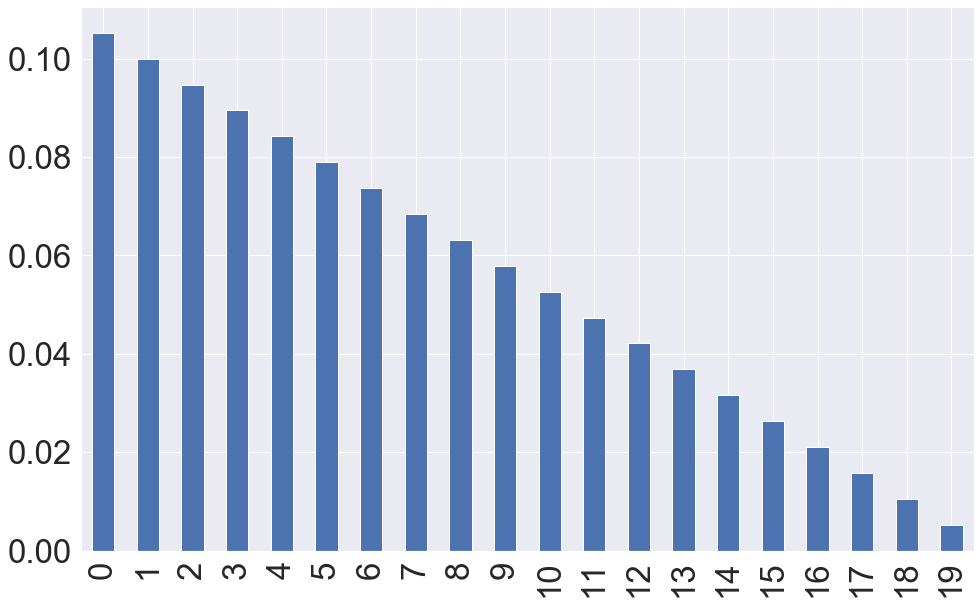

In [7]:
s={}
total=len(search_str)*(len(search_str)-1)/2
for i in range(0,len(search_str)):
    s[i]=(len(search_str)-i)/total
pd.Series(s).plot(kind='bar')

In [8]:
weighted_calculation(gene,search_str)

747     0.036842
1005    0.036579
4757    0.036579
4012    0.036316
5793    0.035789
9642    0.035789
4004    0.034474
4831    0.033947
7461    0.033684
6189    0.033684
dtype: float64